In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.DataFrame(np.array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18, 20, 17, 31, 20, 25, 28, 21, 27]), columns=['perf'])

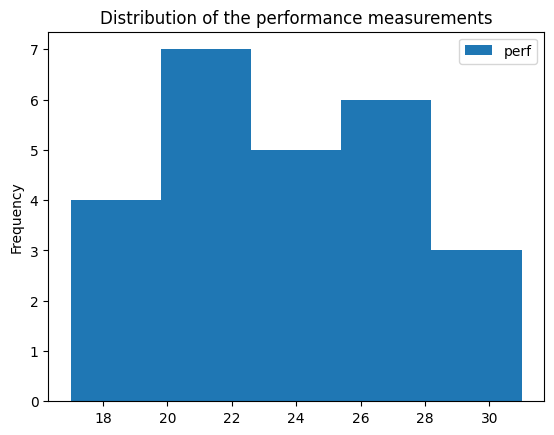

In [16]:
df.plot(kind = 'hist', bins = 5, title = 'Distribution of the performance measurements');

In [17]:
# calculate the bootstrap sample mean
sample_mean = df.mean()
sample_mean

perf    23.6
dtype: float64

In [18]:
sample = df['perf'].sample(n = 25, replace = True)
sample

13    19
23    21
14    24
2     21
7     21
18    17
17    20
15    29
13    19
5     31
13    19
24    27
10    23
21    25
15    29
6     24
3     26
17    20
7     21
5     31
18    17
1     20
10    23
2     21
2     21
Name: perf, dtype: int32

In [19]:
# create a list for sample means
sample_means = []

n_samples = 10000

# loop n_samples times
for i in range(n_samples):
    
    # create a bootstrap sample of sample_size with replacement
    bootstrap_sample = df['perf'].sample(n = 25, replace = True)
    
    # calculate the bootstrap sample mean
    sample_mean = bootstrap_sample.mean()
    
    # add this sample mean to the sample means list
    sample_means.append(sample_mean)

In [20]:
sample_means = pd.Series(sample_means)

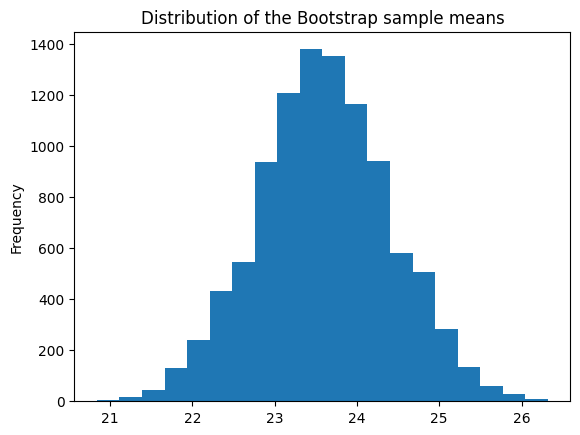

In [21]:
# plot the distribution
sample_means.plot(kind = 'hist', bins = 20, title = 'Distribution of the Bootstrap sample means');

In [22]:
# 2.5% quantile
ci_lower = sample_means.quantile(q = 0.025)

# 97.5% quantile
ci_higher = sample_means.quantile(q = 0.975)

In [23]:
ci_lower, ci_higher

(22.04, 25.2)

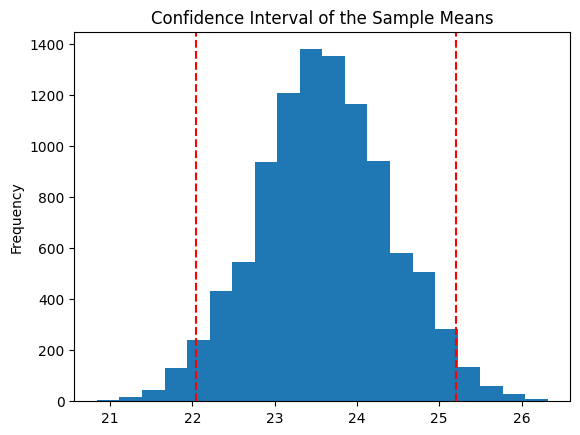

In [24]:
# plot the distribution 
sample_means.plot(kind = 'hist', bins = 20, title = 'Confidence Interval of the Sample Means')

# add the lower bound and upper bound of the confidence interval
plt.axvline(ci_lower, color = 'red', ls = '--')
plt.axvline(ci_higher, color = 'red', ls = '--');

We are 95% confident that the true mean is between 22.04 and 25.2

### Resources

[Bootstrap Confidence Intervals](https://acclab.github.io/bootstrap-confidence-intervals.html)